##### Import the necessary libraries (pandas, NumPy, matplotlib and SciPy).

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats

##### Import the 'Data' worksheet from the Excel-file ('dataset_cac.xlsx') and assign it to a DataFrame variable.

In [2]:
df = pd.read_excel('mfh380_dataset_cac.xlsx',sheet_name = 'Data')
df.head()

,customer_number,region,date_of_sale,item,brand,collection,description,list_price,cost,quantity_sold,sales revenue,variable cost,contribution margin
0,20943,Midwest,2015-01-01,918DP,Jeffrey Alexander,Prestige,Knob,14.14,8.62,434,NaN,NaN,NaN
1,126101,Northwest,2015-01-01,2981AB,Elements,Florence,"3"" pull",6.83,4.27,54,NaN,NaN,NaN
2,161675,West,2015-01-01,910-128PC,Jeffrey Alexander,Modena,128 mm CC pull,17.68,11.08,450,NaN,NaN,NaN
3,175749,West,2015-01-01,351-128PC,Elements,Calloway,"128"" CC pull",7.63,4.85,467,NaN,NaN,NaN
4,216582,West,2015-01-01,S271-3PB,Elements,Torino,"3"" CC pull",2.52,1.60,380,NaN,NaN,NaN


###### Rename the last three columns such that their column names do no longer contain spaces.

In [3]:
df.columns

Index(['customer_number', 'region', 'date_of_sale', 'item', 'brand',
       'collection', 'description', 'list_price', 'cost', 'quantity_sold',
       'sales revenue', 'variable cost', 'contribution margin'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace(' ', '_')
df.columns 

Index(['customer_number', 'region', 'date_of_sale', 'item', 'brand',
       'collection', 'description', 'list_price', 'cost', 'quantity_sold',
       'sales_revenue', 'variable_cost', 'contribution_margin'],
      dtype='object')

##### Convert the data type of 'customer_number' and 'date_of_sale' to string (object).

In [5]:
df['customer_number'] = df['customer_number'].astype("string")
df['date_of_sale'] = df['date_of_sale'].astype("string")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49839 entries, 0 to 49838
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_number      49839 non-null  string 
 1   region               49839 non-null  object 
 2   date_of_sale         49839 non-null  string 
 3   item                 49839 non-null  object 
 4   brand                49839 non-null  object 
 5   collection           49839 non-null  object 
 6   description          49839 non-null  object 
 7   list_price           49839 non-null  float64
 8   cost                 49839 non-null  float64
 9   quantity_sold        49839 non-null  int64  
 10  sales_revenue        0 non-null      float64
 11  variable_cost        0 non-null      float64
 12  contribution_margin  0 non-null      float64
dtypes: float64(5), int64(1), object(5), string(2)
memory usage: 4.9+ MB


##### Check whether there are mistyped values (typos) in the 'region' column (in which there should be 8 unique values), and if so, replace them by the value that would result when the mistyped value is fixed.

In [7]:
df['region'].unique()

array(['Midwest', 'Northwest', 'West', 'Northeast', 'East coast',
       'Central', 'South', 'International', 'Centrall', 'Soouth'],
      dtype=object)

In [8]:
df['region'].loc[df['region']=='Soouth'] = 'South'
df['region'].loc[df['region']=='Centrall'] = 'Central'

C:\Users\Hassan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
regions = df['region'].unique()
regions = np.sort(regions)
regions

array(['Central', 'East coast', 'International', 'Midwest', 'Northeast',
       'Northwest', 'South', 'West'], dtype=object)

##### Calculate (and fill in) the values of the last three columns, and convert them to integers.

In [10]:
df['sales_revenue'] = df['list_price'] * df['quantity_sold']
df['sales_revenue'] = df['sales_revenue'].astype('int')

df['variable_cost'] = df['cost'] * df['quantity_sold']
df['variable_cost'] = df['variable_cost'].astype('int')


df['contribution_margin'] = df['sales_revenue'] - df['variable_cost']
df['contribution_margin'] = df['contribution_margin'].astype('int')

##### Select the data for "your" year (see the column "Year" of Table 1) and assign it to a variable

In [11]:
df['year'] = pd. DatetimeIndex(df['date_of_sale']).year
df.loc[df['year']==2018]

,customer_number,region,date_of_sale,item,brand,collection,description,list_price,cost,quantity_sold,sales_revenue,variable_cost,contribution_margin,year
34417,7675,Northeast,2018-01-01,972SN,Jeffrey Alexander,Marlo,Knob,8.05,5.16,864,6955,4458,2497,2018
34418,24184,East coast,2018-01-01,254-3SN,Elements,Kenner,"3"" CC pull",3.73,2.53,376,1402,951,451,2018
34419,27094,Midwest,2018-01-01,Z290-12PC,Jeffrey Alexander,Durham,"12"" CC app. Pull",126.00,70.24,1609,202734,113016,89718,2018
34420,44765,East coast,2018-01-01,424DACM,Elements,Drake,Knob,5.09,3.54,379,1929,1341,588,2018
34421,67717,Central,2018-01-01,S271-96PC,Elements,Torino,"96"" CC pull",2.75,1.89,554,1523,1047,476,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49834,934167,West,2018-12-31,G130DBAC,Jeffrey Alexander,Harlow,Knob,12.89,8.03,146,1881,1172,709,2018
49835,939351,Northeast,2018-12-31,935-96BNBDL,Jeffrey Alexander,Montclair,96 mm CC pull,18.87,11.66,494,9321,5760,3561,2018
49836,939599,Midwest,2018-12-31,749ABSB,Jeffrey Alexander,Tuscany,Knob,7.05,4.51,893,6295,4027,2268,2018
49837,944258,Central,2018-12-31,Z105MB,Elements,Verona,"3"" pull",3.32,2.05,520,1726,1066,660,2018


###### Create a new DataFrame that contains the total sales revenue, variable cost and contribution margin per region, and structure this DataFrame such that the regions are the columns (use the transpose() method to achieve this).

In [12]:
dataFrame = df[['region','sales_revenue','variable_cost','contribution_margin']]
dataFrame = dataFrame.transpose()
new_header = dataFrame.iloc[0] 
dataFrame = dataFrame[1:] 
dataFrame.columns = new_header
dataFrame.head()

region,Midwest,Northwest,West,West,West,Northeast,East coast,East coast,Central,West,...,South,West,Northwest,Central,Central,West,Northeast,Midwest,Central,West
sales_revenue,6136,368,7956,3563,957,11816,684,4770,1950,10538,...,5210,118,18075,104706,2087,1881,9321,6295,1726,1343
variable_cost,3741,230,4986,2264,608,7420,436,3180,1124,6591,...,3115,70,11709,64286,1300,1172,5760,4027,1066,843
contribution_margin,2395,138,2970,1299,349,4396,248,1590,826,3947,...,2095,48,6366,40420,787,709,3561,2268,660,500


##### Import the data from "your" two other worksheets (see the column "Other worksheets" of Table 1) from the Excel file and assign them to two DataFrame variables.

In [13]:
fixedDf = pd.read_excel('mfh380_dataset_cac.xlsx',sheet_name = 'Fixed_18-A')
new_header = fixedDf.iloc[1] 
fixedDf = fixedDf[2:] 
fixedDf.columns = new_header
fixedDf=fixedDf.set_index(fixedDf.columns[0])
fixedDf.head()

1,Central,East coast,International,Midwest,Northeast,Northwest,South,West
nan,,,,,,,,
Direct fixed expenses,5278312,7513545,690587,9874330,3965187,4968774,6849541,9065478
Common allocated costs,1219464,1589821,217290,2018055,814835,1075209,980076,1665250


In [14]:
marginDf = pd.read_excel('mfh380_dataset_cac.xlsx',sheet_name = 'Margin_18-A')
new_header = marginDf.iloc[1] 
marginDf = marginDf[2:] 
marginDf.columns = new_header
marginDf=marginDf.set_index(marginDf.columns[0])
marginDf.head()

1,Central,East coast,International,Midwest,Northeast,Northwest,South,West,Total of all regions
nan,,,,,,,,,
Sales revenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Less variable expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contribution margin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Less direct fixed expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment margin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Calculate (and fill in) the values (which are sums) in the Segment Margin Report (i.e., the last DataFrame).

In [15]:
def returnSum(dict):
    sum = 0
    for i in dict:
        sum = sum + dict[i]
    return sum

In [16]:
sales = {}
variableExpense = {}
contribution_margin = {}
fixed = fixedDf.loc['Direct fixed expenses'].to_dict()
common = fixedDf.loc['Common allocated costs'].to_dict()

for i in regions:
    s = df['sales_revenue'].loc[df['region']==i].sum()
    v = df['variable_cost'].loc[df['region']==i].sum()
    c = df['contribution_margin'].loc[df['region']==i].sum()
    sales[i] = s
    variableExpense[i] = v
    contribution_margin[i] = c
    
sales['Total of all regions']=returnSum(sales)
variableExpense['Total of all regions']=returnSum(variableExpense)
contribution_margin['Total of all regions']=returnSum(contribution_margin)
fixed['Total of all regions']=returnSum(fixed)
common['Total of all regions']=returnSum(common)



seg = {key: contribution_margin[key] - fixed.get(key, 0)
                       for key in contribution_margin.keys()}

p ={key: sales[key] - fixed.get(key, 0)
                       for key in sales.keys()}


operation = {key: p[key] - variableExpense.get(key, 0) for key in p.keys()}



print("Sales Revenue: ",sales)
print("\nLess variable expenses: ", variableExpense)
print("\nContribution margin: ",contribution_margin)
print("\nFixed: ",fixed)
print("\nSegemnt margin", seg)
print("\nLess common fixed costs allocated to regions", common)
print("\nOperating income (loss)", operation)

Sales Revenue:  {'Central': 62707180, 'East coast': 85280237, 'International': 9064256, 'Midwest': 88868120, 'Northeast': 41480966, 'Northwest': 53721645, 'South': 57334785, 'West': 86596892, 'Total of all regions': 485054081}

Less variable expenses:  {'Central': 39732939, 'East coast': 51661190, 'International': 5503447, 'Midwest': 53949951, 'Northeast': 25179649, 'Northwest': 32624335, 'South': 34844808, 'West': 52569379, 'Total of all regions': 296065698}

Contribution margin:  {'Central': 22974241, 'East coast': 33619047, 'International': 3560809, 'Midwest': 34918169, 'Northeast': 16301317, 'Northwest': 21097310, 'South': 22489977, 'West': 34027513, 'Total of all regions': 188988383}

Fixed:  {'Central': 5278312, 'East coast': 7513545, 'International': 690587, 'Midwest': 9874330, 'Northeast': 3965187, 'Northwest': 4968774, 'South': 6849541, 'West': 9065478, 'Total of all regions': 48205754}

Segemnt margin {'Central': 17695929, 'East coast': 26105502, 'International': 2870222, 'Mi

In [17]:
marginDf.loc['Sales revenue'] = pd.Series(sales)
marginDf.loc['Less variable expenses'] = pd.Series(variableExpense)
marginDf.loc['Contribution margin'] = pd.Series(contribution_margin)
marginDf.loc['Less direct fixed expenses'] = pd.Series(fixed)
marginDf.loc['Segment margin'] = pd.Series(seg)
marginDf.loc['Less common fixed costs allocated to regions'] = pd.Series(common)
marginDf.loc['Operating income (loss)'] = pd.Series(operation)
marginDf

1,Central,East coast,International,Midwest,Northeast,Northwest,South,West,Total of all regions
nan,,,,,,,,,
Sales revenue,62707180,85280237,9064256,88868120,41480966,53721645,57334785,86596892,485054081
Less variable expenses,39732939,51661190,5503447,53949951,25179649,32624335,34844808,52569379,296065698
Contribution margin,22974241,33619047,3560809,34918169,16301317,21097310,22489977,34027513,188988383
Less direct fixed expenses,5278312,7513545,690587,9874330,3965187,4968774,6849541,9065478,48205754
Segment margin,17695929,26105502,2870222,25043839,12336130,16128536,15640436,24962035,140782629
Less common fixed costs allocated to regions,1219464,1589821,217290,2018055,814835,1075209,980076,1665250,9580000
Operating income (loss),17695929,26105502,2870222,25043839,12336130,16128536,15640436,24962035,140782629


##### Provide a crosstabulation table showing the number of transactions per region per brand, and test whether the relationship between these two variables is significant using the chi-square test of independence.

In [18]:
table = pd.crosstab(df.brand, df.region, margins=True, margins_name="Total")
table

region,Central,East coast,International,Midwest,Northeast,Northwest,South,West,Total
brand,,,,,,,,,
Elements,10422,1922,260,1595,1245,1462,1872,2430,21208
Jeffrey Alexander,1824,5953,636,3715,2846,3490,4435,5732,28631
Total,12246,7875,896,5310,4091,4952,6307,8162,49839


In [19]:
pvalue=chi2_contingency(table)[1]
pvalue

0.0

##### Calculate the average quantity sold per brand, and test whether the difference in average quantity sold between the two brands is significant using (a) the t-test for two independent samples and(b) the Mann-Whitney test.

In [20]:
average = df.groupby('region')['quantity_sold'].mean().reset_index()
average

,region,quantity_sold
0,Central,506.581414
1,East coast,504.292825
2,International,520.760045
3,Midwest,824.888512
4,Northeast,500.468345
5,Northwest,505.125606
6,South,439.958300
7,West,507.772972


In [21]:
stats.ttest_ind((df.loc[df['region']=='Central'])['quantity_sold'], (df.loc[df['region']=='West'])['quantity_sold'])

Ttest_indResult(statistic=-0.29200398096012553, pvalue=0.7702865486392159)

In [22]:
stats.mannwhitneyu((df.loc[df['region']=='Central'])['quantity_sold'], (df.loc[df['region']=='West'])['quantity_sold'])

MannwhitneyuResult(statistic=49859230.0, pvalue=0.3885753650047961)

##### Calculate the average quantity sold per region, and test whether the difference in average quantity sold between the eight regions is significant using (a) the one-way ANOVA test and (b) the Kruskal-Wallis test.

In [23]:
stats.f_oneway((df.loc[df['region']=='Central'])['quantity_sold'], (df.loc[df['region']=='West'])['quantity_sold'])

F_onewayResult(statistic=0.08526632489656222, pvalue=0.7702865486383057)

In [24]:
stats.kruskal((df.loc[df['region']=='Central'])['quantity_sold'], (df.loc[df['region']=='West'])['quantity_sold'])

KruskalResult(statistic=0.08010896405457071, pvalue=0.7771498004049996)

##### Provide a table showing the average sales revenue, variable cost and contribution margin per region per brand.

In [25]:
average2 = df.groupby(['region','brand'])['sales_revenue','variable_cost','contribution_margin'].mean()
average2

C:\Users\Hassan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


sales_revenue  variable_cost  \
region        brand                                             
Central       Elements             3692.406736    2415.757340   
              Jeffrey Alexander   13281.204496    7980.217105   
East coast    Elements             3903.460978    2549.461498   
              Jeffrey Alexander   13065.309088    7855.052075   
International Elements             3709.723077    2440.934615   
              Jeffrey Alexander   12735.421384    7655.352201   
Midwest       Elements             6140.021317    4045.624451   
              Jeffrey Alexander   21285.272140   12785.243607   
Northeast     Elements             3860.253815    2534.808835   
              Jeffrey Alexander   12886.489810    7738.514406   
Northwest     Elements             3798.666211    2480.779754   
              Jeffrey Alexander   13801.717765    8308.720630   
South         Elements             3195.776175    2089.980769   
              Jeffrey Alexander   11578.870800    6974.602931   
West          Elements             3557.492593    2345.922634   
              Jeffrey Alexander   13599.474006    8176.689986   

                                 contribution_margin  
region        brand                                   
Central       Elements                   1276.649396  
              Jeffrey Alexander          5300.987390  
East coast    Elements                   1353.999480  
              Jeffrey Alexander          5210.257013  
International Elements                   1268.788462  
              Jeffrey Alexander          5080.069182  
Midwest       Elements                   2094.396865  
              Jeffrey Alexander          8500.028533  
Northeast     Elements                   1325.444980  
              Jeffrey Alexander          5147.975404  
Northwest     Elements                   1317.886457  
              Jeffrey Alexander          5492.997135  
South         Elements                   1105.795406  
              Jeffrey Alexander          4604.267869  
West          Elements                   1211.569959  
              Jeffrey Alexander          5422.784020

##### Provide a bar chart showing the average sales revenue, variable cost and contribution margin per region per brand.

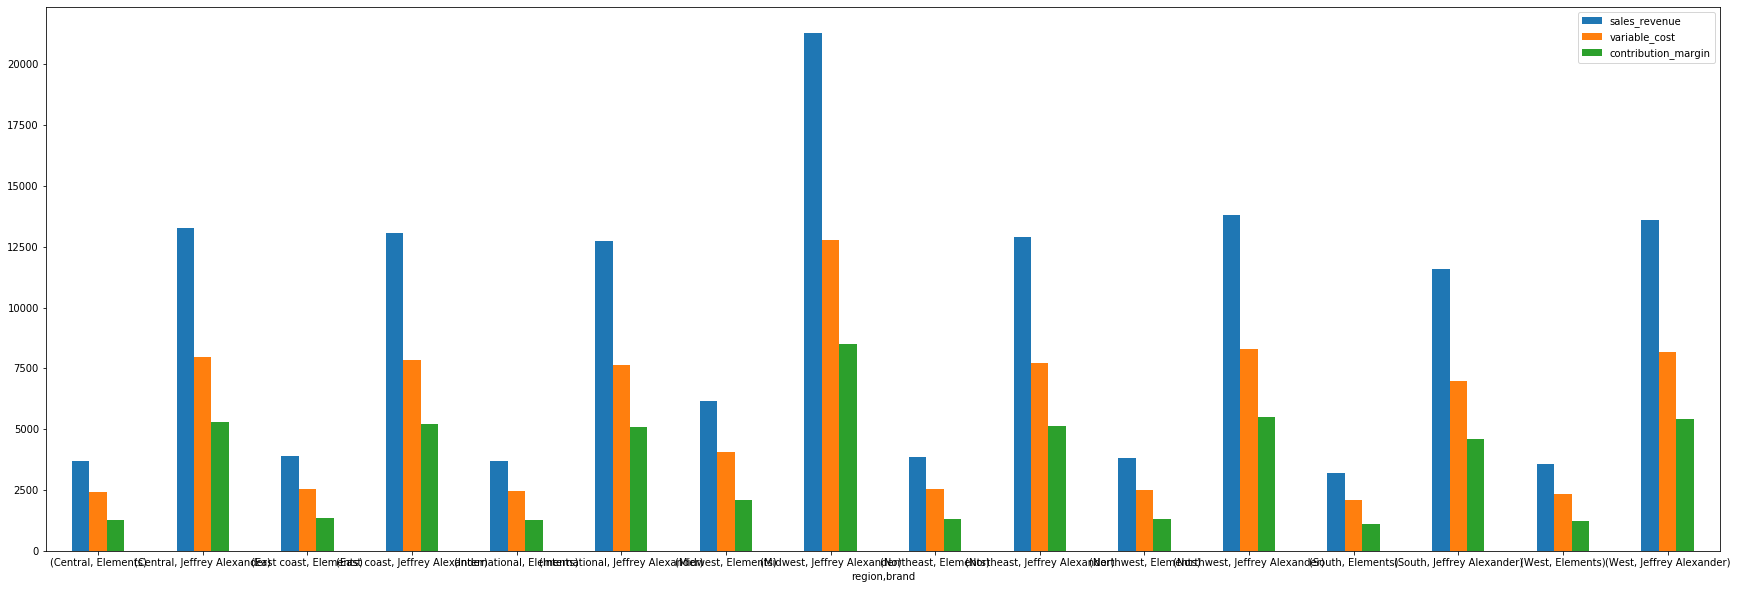

In [26]:
ax = average2.plot.bar(rot=0,figsize=(30,10))